# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[46, 42, 69, ..., 43, 93, 56],
       [46, 23, 94, ..., 38, 94, 59],
       [85, 30, 82, ..., 64, 67, 57],
       ...,
       [72, 75, 64, ..., 14, 26, 86],
       [12, 90, 77, ...,  5, 44, 63],
       [46,  8,  6, ...,  6, 23, 40]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
rng = np.random.default_rng()

rng.shuffle(A, axis=1)
A

array([[65,  4, 99, ..., 87, 94, 78],
       [60, 51, 19, ..., 57, 87, 97],
       [46, 24, 41, ..., 58, 98, 88],
       ...,
       [11, 37, 35, ..., 50, 32, 57],
       [22, 50,  4, ..., 69, 17,  0],
       [20, 34, 50, ..., 97, 49, 31]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A[A[:, ::2].sum(axis=1) > A[:, 1::2].sum(axis=1).mean()]

array([[46, 24, 41, ..., 58, 98, 88],
       [20, 98, 31, ..., 60, 65, 31],
       [70, 84, 65, ..., 39, 37, 78],
       ...,
       [ 1, 11, 67, ..., 59, 26, 32],
       [11, 37, 35, ..., 50, 32, 57],
       [22, 50,  4, ..., 69, 17,  0]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
np.argmax(A.max(axis=1) - A.min(axis=1))

8

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
A.argsort(axis=None).argsort().reshape(A.shape) + 1

array([[6497,  507, 9919, ..., 8724, 9420, 7846],
       [5996, 5143, 1922, ..., 5754, 8710, 9777],
       [4657, 2445, 4134, ..., 5810, 9813, 8859],
       ...,
       [1144, 3734, 3518, ..., 5045, 3232, 5740],
       [2219, 5048,  423, ..., 6857, 1722,    5],
       [2005, 3451, 5088, ..., 9760, 4936, 3150]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
(A - np.vstack(A.min(axis=1))) / np.vstack(A.max(axis=1) - A.min(axis=1))

array([[0.64948454, 0.02061856, 1.        , ..., 0.87628866, 0.94845361,
        0.78350515],
       [0.60215054, 0.50537634, 0.16129032, ..., 0.56989247, 0.89247312,
        1.        ],
       [0.44210526, 0.21052632, 0.38947368, ..., 0.56842105, 0.98947368,
        0.88421053],
       ...,
       [0.10204082, 0.36734694, 0.34693878, ..., 0.5       , 0.31632653,
        0.57142857],
       [0.22222222, 0.50505051, 0.04040404, ..., 0.6969697 , 0.17171717,
        0.        ],
       [0.20618557, 0.35051546, 0.51546392, ..., 1.        , 0.50515464,
        0.31958763]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
A * np.arange(1, 11).reshape(10, 1, 1)

array([[[ 65,   4,  99, ...,  87,  94,  78],
        [ 60,  51,  19, ...,  57,  87,  97],
        [ 46,  24,  41, ...,  58,  98,  88],
        ...,
        [ 11,  37,  35, ...,  50,  32,  57],
        [ 22,  50,   4, ...,  69,  17,   0],
        [ 20,  34,  50, ...,  97,  49,  31]],

       [[130,   8, 198, ..., 174, 188, 156],
        [120, 102,  38, ..., 114, 174, 194],
        [ 92,  48,  82, ..., 116, 196, 176],
        ...,
        [ 22,  74,  70, ..., 100,  64, 114],
        [ 44, 100,   8, ..., 138,  34,   0],
        [ 40,  68, 100, ..., 194,  98,  62]],

       [[195,  12, 297, ..., 261, 282, 234],
        [180, 153,  57, ..., 171, 261, 291],
        [138,  72, 123, ..., 174, 294, 264],
        ...,
        [ 33, 111, 105, ..., 150,  96, 171],
        [ 66, 150,  12, ..., 207,  51,   0],
        [ 60, 102, 150, ..., 291, 147,  93]],

       ...,

       [[520,  32, 792, ..., 696, 752, 624],
        [480, 408, 152, ..., 456, 696, 776],
        [368, 192, 328, ..., 464, 784, 704

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[65, 99, 42, ..., 78, 87, 78],
       [60, 19, 23, ..., 18, 57, 97],
       [46, 41, 30, ..., 71, 58, 88],
       ...,
       [11, 35, 75, ..., 56, 50, 57],
       [22,  4, 90, ..., 99, 69,  0],
       [20, 50,  8, ..., 17, 97, 31]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
np.count_nonzero(np.all(A > 5, axis=1))

5

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
np.array(np.split(A, 10)).mean(axis=0)

array([[52.3, 41.1, 41.2, 57.7, 45.7, 42.6, 60.3, 59.3, 63.2, 51.3, 58.5,
        58.3, 33.9, 16.9, 62.5, 41.1, 54.9, 41.1, 45.9, 53.1, 33.4, 28.1,
        47.8, 53.9, 56.5, 59.1, 50.3, 35.2, 49.5, 51. , 42.6, 38.9, 38.3,
        32.3, 59. , 53.4, 53.5, 62.1, 36.3, 59.4, 60.4, 48.8, 60.4, 44.4,
        33.6, 59.8, 64.6, 55.6, 51.5, 65.5],
       [51.9, 49.1, 75.2, 61.4, 52.6, 54.7, 56.7, 54.2, 44.9, 47.7, 46.2,
        72.1, 40.1, 45.7, 49. , 64.9, 24.9, 63.4, 40.6, 63.4, 32.5, 35.6,
        61.7, 61.5, 62.3, 62.7, 62.7, 42.3, 44.2, 37.9, 51.7, 62.3, 48.8,
        40.2, 42.1, 42.5, 44.9, 56.7, 64.2, 42.1, 43.7, 60.2, 42.5, 50.8,
        41.5, 47.2, 55.2, 65.2, 45.8, 41.5],
       [47.2, 29.8, 50.7, 46.5, 33.2, 51.7, 61.4, 77.3, 47.7, 53.2, 43.9,
        47.7, 57.5, 53.1, 48.8, 35.6, 50.9, 51.8, 51. , 52.2, 63.6, 46.2,
        54. , 43.8, 41.4, 58.6, 55.6, 37.2, 43.9, 42.4, 45.1, 57.7, 62.7,
        42.6, 37.4, 46.4, 59.3, 38.4, 48.9, 53.4, 40.9, 58.5, 46.7, 44.8,
        53.5, 45. , 50

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
u, ind = np.unique(A.flatten(), return_index=True)
u[np.argsort(ind)]

array([65,  4, 99, 46, 42, 28, 97, 11, 34, 59, 16,  2, 51, 19, 78, 57, 69,
       47, 35, 12, 93, 56, 43, 44, 64, 32, 33, 29,  9,  5, 50, 72, 26, 92,
       13, 31, 87, 94, 60, 23, 63, 96, 24, 75, 21, 38, 14, 40, 70, 22, 67,
       84, 17,  8, 18, 71, 41, 77, 85, 30, 82, 62, 95, 89, 49, 36, 86, 76,
       58, 98, 88, 66, 52,  3,  1, 74,  6, 83, 81, 48, 27, 15, 91, 20, 10,
       45,  0,  7, 39, 73, 37, 25, 61, 79, 68, 54, 90, 55, 80, 53])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
mean = A.mean(axis=0)
np.sqrt(np.sum((A - mean) ** 2, axis=1))

array([203.09036812, 194.18382431, 198.55487308, 220.10401547,
       208.02431979, 193.31512518, 177.67720063, 209.30857036,
       218.01467296, 206.16856604, 213.18899508, 238.09926003,
       191.43416003, 212.50632373, 201.38931855, 182.42129159,
       210.51994591, 190.81849393, 212.71503855, 212.74996504,
       217.73609628, 230.86995826, 194.32595716, 212.7898438 ,
       195.73890166, 216.95026533, 198.49135403, 207.0898057 ,
       204.98045669, 219.40111127, 205.28333499, 223.92116386,
       183.4451897 , 179.85248851, 203.19357181, 182.31156745,
       205.79501361, 206.86156633, 223.50030789, 200.20533865,
       193.35521101, 219.44700414, 200.84968913, 209.52526727,
       200.04181469, 212.90530201, 191.52088039, 190.08650038,
       224.66434436, 193.78056565, 196.37071478, 221.18607014,
       193.4427244 , 203.96508923, 186.78291577, 187.60047341,
       201.8844165 , 211.42045224, 184.69625774, 206.26080002,
       204.22509059, 189.84377163, 212.00574904, 199.00

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A < 50, A * 2, A * 3)

array([[195,   8, 297, ..., 261, 282, 234],
       [180, 153,  38, ..., 171, 261, 291],
       [ 92,  48,  82, ..., 174, 294, 264],
       ...,
       [ 22,  74,  70, ..., 150,  64, 171],
       [ 44, 150,   8, ..., 207,  34,   0],
       [ 40,  68, 150, ..., 291,  98,  62]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив их размерности нулями справа.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def moving_average(arr, window):
    return np.convolve(arr, np.ones(window), "valid") / window

(moving_average(A.flatten(), 3) + 
np.concatenate((moving_average(A.flatten(), 5), np.zeros(2))) + 
np.concatenate((moving_average(A.flatten(), 10), np.zeros(7))))

array([154.4       , 143.66666667, 162.33333333, ...,  99.73333333,
        63.        ,  59.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

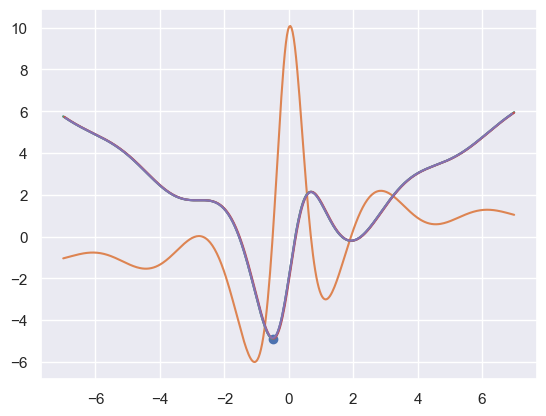

In [15]:
from scipy.misc import derivative
from scipy.optimize import fmin_bfgs

f = lambda x: (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.linspace(-7, 7, 400)
y = f(x)

plt.plot(x, y)
plt.plot(x, derivative(f, x, dx=1e-6))

min = fmin_bfgs(f, 0, disp=False)
plt.scatter(min, f(min))

plt.plot(x, moving_average(y, 1))
plt.plot(x[1:], moving_average(y, 2))
plt.plot(x[2:-2], moving_average(y, 5))

plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[4, 0, 0, 4, 4]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [17]:
import numpy.typing as npt

def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    assert x.size > 0

    cumsum = np.cumsum(x)
    val = np.random.rand(c) * np.sum(x)
    res = np.argmax(cumsum > val.reshape(c, 1), axis=1)

    return res

np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([0, 0, 4, 4, 0], dtype=int64)

In [18]:
from scipy.stats import ttest_ind

a = sample([50, 3, 1, 7, 20], 5)
b = np_sample(np.array([50, 3, 1, 7, 20]), 5)

ttest_ind(a, b)

Ttest_indResult(statistic=0.31046021028253307, pvalue=0.7641453232978952)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [19]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2117

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [20]:
def np_walk(n: int):
    return np.random.randint(-3, 4, n).sum()

np_walk(10_000)

80

In [21]:
%timeit walk(10_000)
%timeit np_walk(10_000)

2.59 ms ± 38.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
41.3 µs ± 497 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<AxesSubplot: ylabel='Density'>

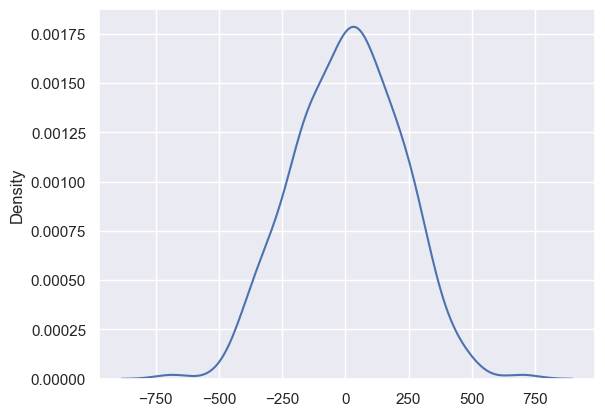

In [23]:
n = 300

res_np_walk = np.zeros(n)

for i in range(n):
    res_np_walk[i] = np_walk(10_000)

sns.kdeplot(data=res_np_walk)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [24]:
a = np.random.random((10000, 10000))

In [25]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

strange_conv(a)


1.1156308458419302

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

- Numba:

In [26]:
import numba

strange_conv_numba = numba.jit(strange_conv)
strange_conv_numba(a)

1.1156308458419302

- Cython

In [27]:
import cython

%load_ext cython

In [28]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray["double", ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.0
    cdef double c
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [29]:
strange_conv_cython(a)

1.1156308458419302

- Taichi

In [30]:
import taichi as ti

ti.init(arch=ti.cpu)

@ti.kernel
def strange_conv_taichi(a: ti.types.ndarray()) -> ti.f64:
    _x = a.shape[0]
    _y = a.shape[1]

    t = 1.
    for y in range(_y - 5):
        for x in range(_x - 4 * (y + 1) + 1):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t

strange_conv_taichi(a)

[Taichi] version 1.3.0, llvm 15.0.1, commit 0f25b95e, win, python 3.10.8
[Taichi] Starting on arch=x64


0.4217783510684967

- Pythran

In [31]:
import pythran

%load_ext pythran.magic

In [ ]:
%%pythran
#pythran export strange_conv_pythran(float64[:,:])
def strange_conv_pythran(a):
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [ ]:
strange_conv_pythran(a)

- Сравнение производительности

In [34]:
%timeit strange_conv(a)

10.5 s ± 3.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit strange_conv_numba(a)

21.2 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit strange_conv_cython(a)

42.6 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
